###  Load the ECG Data

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the ECG data
data = pd.read_csv('ecg.csv', header=None)

# Separate features (ECG signals) and labels
X = data.iloc[:, :-1].values  # All columns except the last (ECG signals)
y = data.iloc[:, -1].values   # The last column (label)

# Normalize ECG data to have values between 0 and 1
X = X / np.max(np.abs(X), axis=1, keepdims=True)

# Define the target image size (28x28 pixels = 784 features)
target_size = 28 * 28  # 784

# Pad or truncate the ECG signals to match the target size (28x28)
X_padded = []
for x in X:
    if len(x) > target_size:
        x = x[:target_size]  # Truncate
    elif len(x) < target_size:
        x = np.pad(x, (0, target_size - len(x)), 'constant')  # Pad with zeros
    X_padded.append(x)

X_padded = np.array(X_padded)  # Convert the list back to a numpy array

# Reshape to simulate image format (28x28 "image")
X_reshaped = X_padded.reshape(X_padded.shape[0], 28, 28, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Encode labels (in case they are not numeric)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Output the reshaped data shape to verify
print(f"Shape of training data: {X_train.shape}")
print(f"Shape of test data: {X_test.shape}")


Shape of training data: (3998, 28, 28, 1)
Shape of test data: (1000, 28, 28, 1)


### Model Architecture

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # First convolutional layer
    MaxPooling2D(pool_size=(2, 2)),                                  # Max pooling
    Conv2D(64, (3, 3), activation='relu'),                            # Second convolutional layer
    MaxPooling2D(pool_size=(2, 2)),                                  # Max pooling
    Flatten(),                                                       # Flatten the output for the dense layers
    Dense(128, activation='relu'),                                    # Fully connected layer
    Dropout(0.5),                                                     # Dropout to prevent overfitting
    Dense(len(np.unique(y)), activation='softmax')                    # Output layer with softmax activation for classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

C:\Users\sonal\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 224,002 (875.01 KB)

 Trainable params: 224,002 (875.01 KB)

 Non-trainable params: 0 (0.00 B)

### Training the Model

In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9018 - loss: 0.2651 - val_accuracy: 0.9870 - val_loss: 0.0492
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9863 - loss: 0.0449 - val_accuracy: 0.9940 - val_loss: 0.0273
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9870 - loss: 0.0442 - val_accuracy: 0.9900 - val_loss: 0.0238
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9905 - loss: 0.0378 - val_accuracy: 0.9920 - val_loss: 0.0212
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9905 - loss: 0.0403 - val_accuracy: 0.9940 - val_loss: 0.0145
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9894 - loss: 0.0366 - val_accuracy: 0.9960 - val_loss: 0.0157
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9896 - loss: 0.0395 - val_accuracy: 0.9970 - val_loss: 0.0118
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9920 - loss: 0.0281 - val_accu

### Evaluating the Model

In [8]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9975 - loss: 0.0088
Test Loss: 0.0119
Test Accuracy: 0.9960


###  Visualizing the Performance

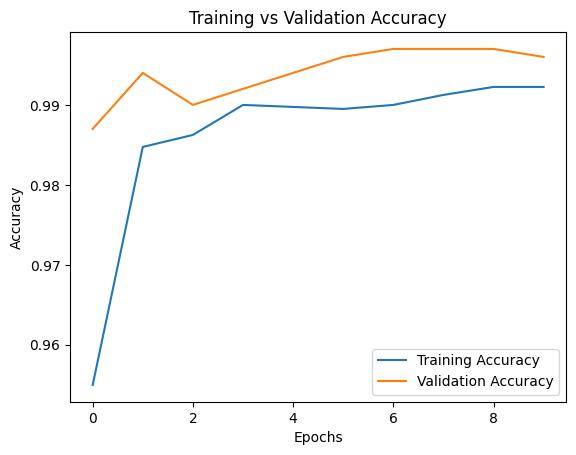

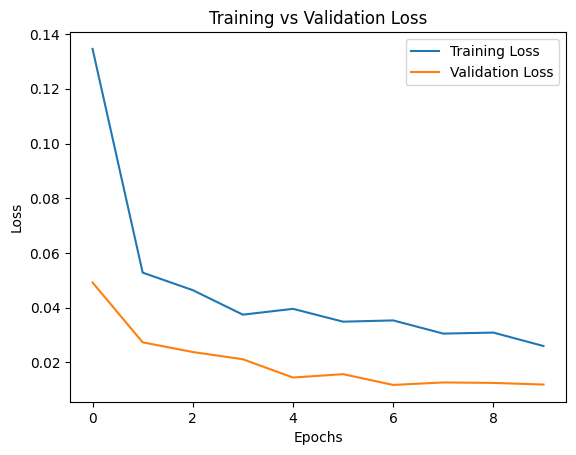

In [9]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
